In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/home/shibinbin/ibme/projects/Deepfold2


In [84]:
import h5py
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 150
import pandas as pd

In [6]:
with h5py.File('data/icSHAPE/Lu_2016_invivo/all', 'r') as f:
    rpkm = f['meta/rpkm'][:]
    icshape = f['feature/icshape'][:]
    start = f['start'][:]
    end = f['end'][:]

In [5]:
rpkm

array([337.45120652,  25.07394746,  16.61577639, ...,  32.02531856,
        18.98812531,  29.05980778])

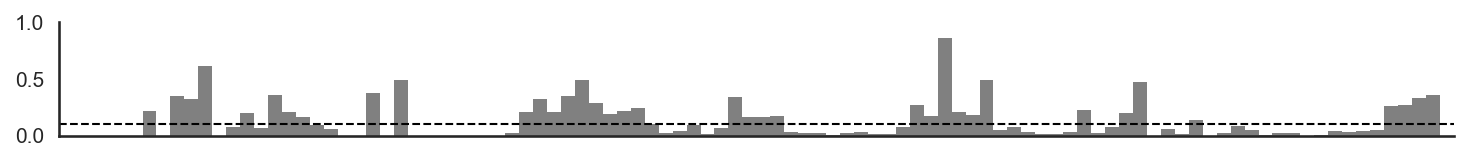

In [58]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12, 1))
x = np.arange(100)
y = np.nan_to_num(icshape[:100])
ax.fill_between(x, y, step='pre', edgecolor='none', facecolor='gray')
ax.set_ylim(0, 1)
ax.set_xlim(0, 100)
ax.axhline(0.1, color='k', linestyle='dashed', linewidth=1)
ax.set_xticks([])
#ax.set_yticks([])
#ax.tick_params(top=False, right=False)
sns.despine(top=True, left=False)
plt.savefig('tmp/raw_reactivities.pdf')

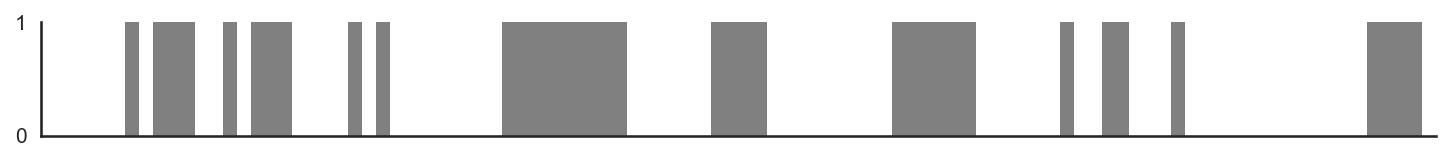

In [59]:
fig, ax = plt.subplots(figsize=(12, 1))
ax.fill_between(x, (y > 0.1).astype(np.int32), step='pre', edgecolor='none', facecolor='gray')
ax.set_ylim(0, 1)
ax.set_xlim(0, 100)
#ax.axhline(0.1, color='k', linestyle='dashed', linewidth=1)
ax.set_xticks([])
ax.set_yticks([0, 1])
#ax.tick_params(top=False, right=False)
sns.despine(top=True, left=False)
plt.savefig('tmp/binarized.pdf')

In [81]:
'''
Lu_2016_invitro_hg19_longest	mlp1	percentile_5	128	0.677356	0.642050
Lu_2016_invivo_hg19_longest	mlp1	percentile_5	128	0.669726	0.625919
Cell_2018_kasugamycin_SHAPE	resnet1	percentile_10	128	0.620676	0.588756
Cell_2018_incell_SHAPE	basic	percentile_5	128	0.609861	0.585096
Cell_2018_cellfree_SHAPE	mlp1	percentile_10	128	0.588976	0.570928
'''
predicted_files = {
    'Human_icSHAPE_invitro': 'd=Lu_2016_invitro_hg19_longest,b=percentile_5,w=128,m=mlp1,i=all',
    'Human_icSHAPE_invivo': 'd=Lu_2016_invivo_hg19_longest,b=percentile_5,w=128,m=mlp1,i=all',
    'SHAPEMaP_kasugamycin': 'd=Cell_2018_kasugamycin_SHAPE,b=percentile_10,w=128,m=resnet1,i=all',
    'SHAPEMaP_incell': 'd=Cell_2018_incell_SHAPE,b=percentile_5,w=128,m=basic,i=all',
    'SHAPEMaP_cellfree': 'd=Cell_2018_cellfree_SHAPE,b=percentile_10,w=128,m=mlp1,i=all'
}

In [77]:
list(predicted_files.keys())

['Human_icSHAPE_invitro',
 'Human_icSHAPE_invivo',
 'icSHAPE_kasugamycin',
 'icSHAPE_incell',
 'icSHAPE_cellfree']

In [82]:
import os

output_dir = 'output/evaluate_model_RNAs'
for dataset, filename in predicted_files.items():
    if not os.path.exists(os.path.join(output_dir, dataset)):
        os.makedirs(os.path.join(output_dir, dataset))
    with h5py.File(os.path.join('output/predict_reactivity/model_RNAs_domains/predict',
                                filename), 'r') as f:
        for rna_id in f.keys():
            values = f[rna_id][:]
            with open(os.path.join(output_dir, dataset, '{}.restraint'.format(rna_id)), 'w') as fout:
                for i, value in enumerate(values):
                    fout.write('{}\t{}\n'.format(i + 1, 1.0 - value))

In [103]:
sen = pd.read_table('output/evaluate_model_RNAs/summary_all/RNAstructure.ppv.txt')
sen = sen.loc[:,['rna_id', 'Human_icSHAPE_invitro', 'Human_icSHAPE_invivo', 'nodata']]
sen

,rna_id,Human_icSHAPE_invitro,Human_icSHAPE_invivo,nodata
0,16SRRNA-domain1,43.64,54.55,54.55
1,16SRRNA-domain2,80.00,80.00,79.05
2,16SRRNA-domain3,44.20,44.20,29.71
3,16SRRNA-domain4,82.61,82.61,73.91
4,23SRRNA-domain1,54.05,54.05,54.73
5,23SRRNA-domain2,50.98,72.06,79.90
6,23SRRNA-domain3,74.55,73.64,47.27
7,23SRRNA-domain4,48.45,48.45,69.07
8,23SRRNA-domain5,48.33,48.33,48.33
9,23SRRNA-domain6,68.00,68.00,68.00


In [89]:
sen.columns

Index(['rna_id', 'Human_icSHAPE_invitro', 'Human_icSHAPE_invivo',
       'SHAPEMaP_cellfree', 'SHAPEMaP_incell', 'SHAPEMaP_kasugamycin',
       'nodata'],
      dtype='object')

[Text(0,0,'16SRRNA-domain1'),
 Text(0,0,'16SRRNA-domain2'),
 Text(0,0,'16SRRNA-domain3'),
 Text(0,0,'16SRRNA-domain4'),
 Text(0,0,'23SRRNA-domain1'),
 Text(0,0,'23SRRNA-domain2'),
 Text(0,0,'23SRRNA-domain3'),
 Text(0,0,'23SRRNA-domain4'),
 Text(0,0,'23SRRNA-domain5'),
 Text(0,0,'23SRRNA-domain6'),
 Text(0,0,'5SRRNA'),
 Text(0,0,'HCV_domain2'),
 Text(0,0,'TPPribo-ecoli')]

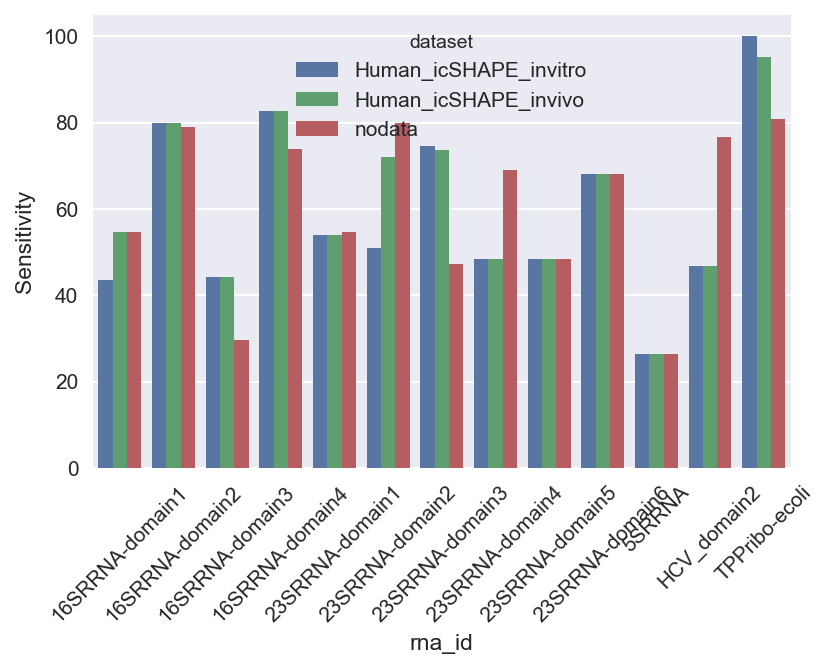

In [113]:
ax = sns.barplot(x='rna_id', y='Sensitivity', hue='dataset', ci='sd',
            data=sen.melt(id_vars=['rna_id'],
         value_vars=['Human_icSHAPE_invitro', 'Human_icSHAPE_invivo',
       'nodata'], var_name='dataset', value_name='Sensitivity'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='default')
#plt.tight_layout()

In [96]:
ax.set_xticklabels?

In [114]:
matplotlib.style.available

['seaborn-darkgrid',
 'grayscale',
 'seaborn-poster',
 'bmh',
 'seaborn-dark-palette',
 'fast',
 'seaborn-muted',
 'ggplot',
 '_classic_test',
 'seaborn-dark',
 'seaborn-ticks',
 'classic',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-pastel',
 'tableau-colorblind10',
 'seaborn-paper',
 'seaborn-bright',
 'seaborn',
 'fivethirtyeight',
 'dark_background',
 'seaborn-white',
 'Solarize_Light2']

In [ ]:
X = 